In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
day =[0,1,2,3,4,9,49]

In [4]:
paths = ["reg" ,"lstm","cnn" , "lg"]

In [13]:
def plot_results(predicted_data, true_data , title):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend()
    plt.title(title)
    plt.show()

In [6]:
mean = np.load("data/mean.npy")[3]
std =np.load("data/std.npy")[3]

## Models Performace in Multiple Days Prediction

Day   1   2   3   4   5   10    50
model : reg
mae : 0.388 0.136 0.141 0.194 0.228 0.407 1.309 
rms : 0.442 0.165 0.17 0.224 0.259 0.446 1.389 
mse : 0.195 0.027 0.029 0.05 0.067 0.199 1.929 
r2 : -1.513 0.654 0.633 0.375 0.174 -1.288 -8.101 

multiple days prediction (50)


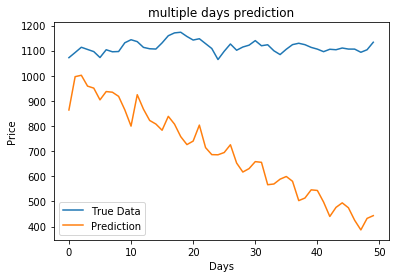

model : lstm
mae : 0.048 0.062 0.077 0.091 0.105 0.166 0.433 
rms : 0.065 0.082 0.1 0.119 0.137 0.214 0.591 
mse : 0.004 0.007 0.01 0.014 0.019 0.046 0.35 
r2 : 0.938 0.898 0.84 0.761 0.664 -0.162 -60.894 

multiple days prediction (50)


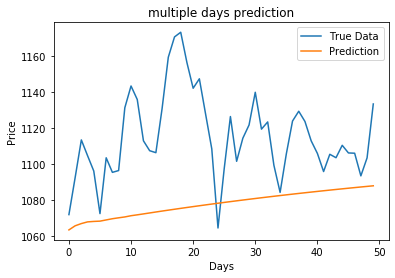

model : cnn
mae : 0.02 0.045 0.06 0.072 0.083 0.128 0.466 
rms : 0.031 0.062 0.082 0.1 0.117 0.177 0.571 
mse : 0.001 0.004 0.007 0.01 0.014 0.031 0.326 
r2 : 0.988 0.951 0.911 0.866 0.818 0.587 -1.693 

multiple days prediction (50)


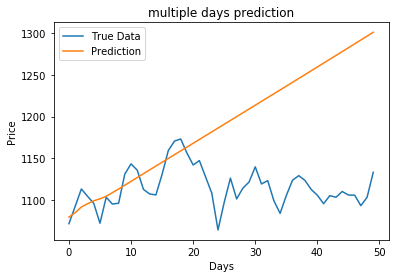

model : lg
mae : 0.057 0.062 0.071 0.082 0.092 0.135 0.333 
rms : 0.08 0.088 0.1 0.114 0.127 0.184 0.469 
mse : 0.006 0.008 0.01 0.013 0.016 0.034 0.22 
r2 : 0.917 0.902 0.875 0.839 0.803 0.615 -0.025 

multiple days prediction (50)


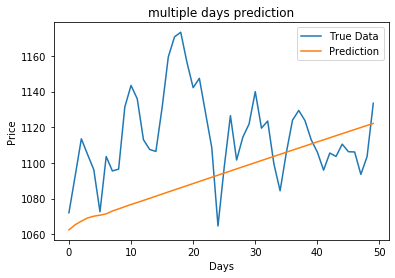

In [14]:
print ("Day   1   2   3   4   5   10    50")
for model in paths :
    model = str(model)
    r2 = np.load("Performance Measures/"+ model +  "/r2" +".npy")
    mse = np.load("Performance Measures/"+ model +  "/mse" +".npy")
    rms = np.load("Performance Measures/"+ model +  "/rms" +".npy")
    mae = np.load("Performance Measures/"+ model +  "/mae" +".npy")
    prediction_seqs = np.load("Performance Measures/"+ model +  "/pred_seqs" +".npy")
    y_actual_seqs = np.load("Performance Measures/"+ model +  "/actual_seqs" +".npy")
    real_pred  = np.load("Performance Measures/"+ model +  "/real_pred" +".npy")
    real_y = np.load("Performance Measures/"+ model +  "/real_y" +".npy")

    mae = np.resize(mae , ( mae.shape[0], ))
    rms = np.resize(rms , ( rms.shape[0], ))
    mse = np.resize(mse , ( mse.shape[0], ))

    
    print("model :",model)
    s = str("mae : ")
    for ix in day:
        ix = str(round(mae[ix],3))
        s = s + ix +" "
    s = s + "\n" 


    s = s+ "rms : "
    for ix in day:
        ix = str(round(rms[ix],3))
        s = s + ix +" "
    s = s + "\n" 


    s = s+"mse : "
    for ix in day:
        ix = str(round(mse[ix],3))
        s = s + ix +" "
    s = s + "\n" 


    s = s+"r2 : "
    for ix in day:
        ix = str(round ( r2[ix],3))
        s = s + ix +" "
    s = s + "\n" 
    
    print(s)
    
    i = 65
    print("multiple days prediction (50)")
    plot_results(prediction_seqs[i]*std +mean , y_actual_seqs[i]*std+mean , "multiple days prediction")
    
    
    #print("single day prediction")
    #plot_results(real_pred[:200] , real_y[:200])

## Models Performace in Single Day Prediction

Day   1   2   3   4   5   10    50
single day prediction


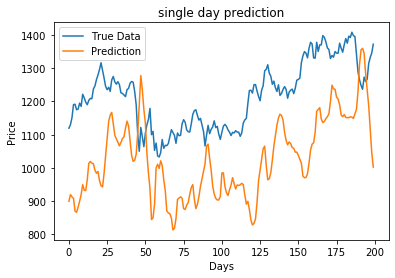

single day prediction


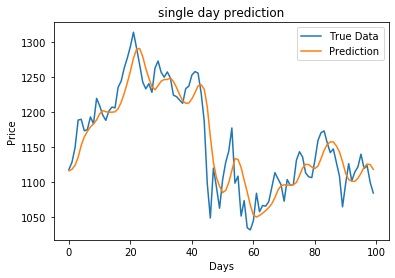

single day prediction


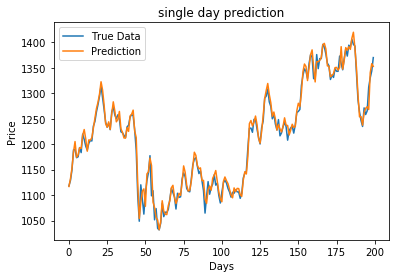

single day prediction


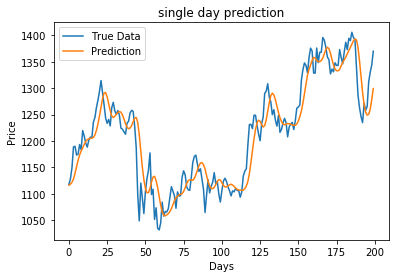

In [15]:
print ("Day   1   2   3   4   5   10    50")
for model in paths :
    model = str(model)
    r2 = np.load("Performance Measures/"+ model +  "/r2" +".npy")
    mse = np.load("Performance Measures/"+ model +  "/mse" +".npy")
    rms = np.load("Performance Measures/"+ model +  "/rms" +".npy")
    mae = np.load("Performance Measures/"+ model +  "/mae" +".npy")
    prediction_seqs = np.load("Performance Measures/"+ model +  "/pred_seqs" +".npy")
    y_actual_seqs = np.load("Performance Measures/"+ model +  "/actual_seqs" +".npy")
    real_pred  = np.load("Performance Measures/"+ model +  "/real_pred" +".npy")
    real_y = np.load("Performance Measures/"+ model +  "/real_y" +".npy")

    mae = np.resize(mae , ( mae.shape[0], ))
    rms = np.resize(rms , ( rms.shape[0], ))
    mse = np.resize(mse , ( mse.shape[0], ))

   
    
    print("single day prediction")
    plot_results(real_pred[:200] , real_y[:200] , "single day prediction")

In [19]:
def provide_data(m):
    loss =[]
    loss.append(m[0])
    loss.append(m[1])
    loss.append(m[2])
    loss.append(m[3])
    loss.append(m[4])
    loss.append(m[9])
    loss.append(m[49])
    loss = [round(num, 2) for num in loss]

    return loss

In [59]:
def plot_results(m1, m2,m3,m4,m5):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    plt.plot( provide_data(m1) , label="M1")
    plt.plot(provide_data(m2), label='M2')
    plt.plot(provide_data(m3), label='M3')
    plt.plot(provide_data(m4), label='M4')
    plt.plot(provide_data(m5), laabel='M5')
    plt.xlabel("Days")
    plt.ylabel("Error")
    plt.legend()
    plt.show()
    
def plot_results(m1, m2,m3,m4):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    plt.plot( provide_data(m1) , label="M2")
    plt.plot(provide_data(m2), label='M3')
    plt.plot(provide_data(m3), label='M4')
    plt.plot(provide_data(m4), label='M5')
    #plt.plot(provide_data(m5), laabel='M5')
    plt.xlabel("Days")
    plt.ylabel("Error")
    plt.legend()
    plt.show()

## Effect of Sequence length

r2


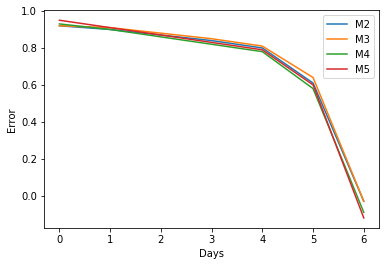

mse


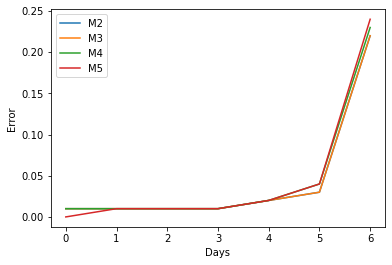

mae


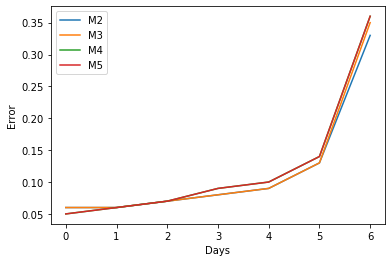

rms


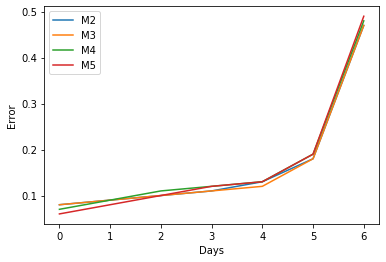

In [60]:
models = ["5" , "10","15" , "20","25"]
error = ["r2" , "mse" , "mae" , "rms"]
for ix in error:
    #m1 = np.load("seq_len/5/"+ix+".npy")
    print(ix)
    m2 = np.load("seq_len/10/"+ix+".npy")
    m3 = np.load("seq_len/15/"+ix+".npy")
    m4 = np.load("seq_len/20/"+ix+".npy")
    m5 = np.load("seq_len/25/"+ix+".npy")
    plot_results(m2,m3,m4,m5)

r2


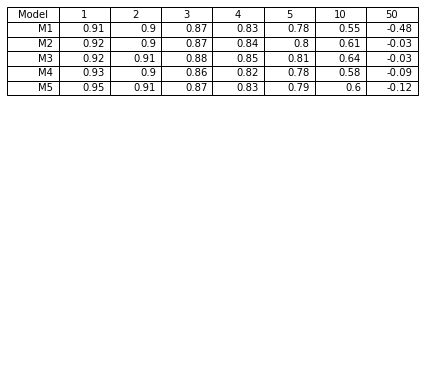

mse


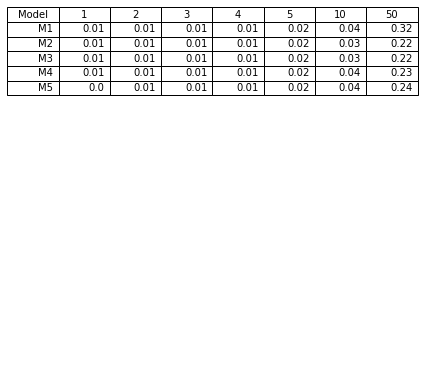

mae


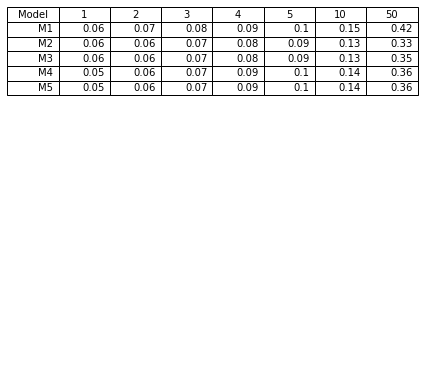

rms


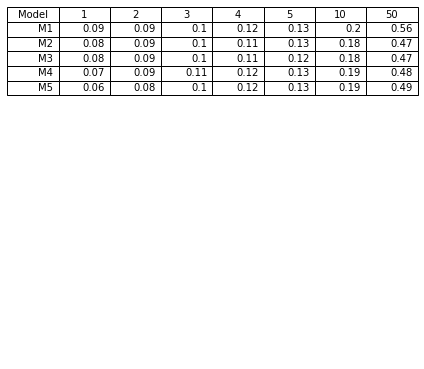

In [58]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

models = ["5" , "10","15" , "20","25"]
error = ["r2" , "mse" , "mae" , "rms"]

for ix in error:
    print(ix)
    m1 = np.load("seq_len/5/"+ix+".npy")
    m2 = np.load("seq_len/10/"+ix+".npy")
    m3 = np.load("seq_len/15/"+ix+".npy")
    m4 = np.load("seq_len/20/"+ix+".npy")
    m5 = np.load("seq_len/25/"+ix+".npy")
    fig, ax = plt.subplots()
    
    # hide axes
    fig.patch.set_visible(False )
    ax.axis('off' )
    #ax.axis('tight')

    
    
    table = []
    table.append(provide_data(m1))
    table.append(provide_data(m2))
    table.append(provide_data(m3))
    table.append(provide_data(m4))
    table.append(provide_data(m5))
    table = np.array(table )
    
    df = pd.DataFrame(table, columns =  ["1","2","3","4",'5',"10","50"])
    df.insert(0,"Model", ["M1","M2","M3","M4","M5"] ,  True)
    ax.table(cellText=df.values, colLabels=["Model","1","2","3","4",'5',"10","50"]
             , loc='top')

    fig.tight_layout()

    plt.show()